# Problem Statement

**Consider only the below columns and prepare a prediction model for predicting Price.**

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Price -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

KM -- Accumulated Kilometers on odometer

HP -- Horse Power

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Assignments/Multi Linear Regression'

Mounted at /content/drive
 50_Startups.csv			   'proble_statement(50_startups).txt'
 Multi_Linear_Regression_Corolla.ipynb	    ToyotaCorolla.csv
 Multi_Linear_Regression_Corolla_V2.ipynb  'Toyota Corolla.txt'
 Multi_Linear_Regression_Startups.ipynb


In [2]:
import os
os.getcwd()
os.chdir('drive/My Drive/Assignments/Multi Linear Regression')
os.getcwd()
os.listdir()

['50_Startups.csv',
 'Toyota Corolla.txt',
 'ToyotaCorolla.csv',
 'proble_statement(50_startups).txt',
 'Multi_Linear_Regression_Startups.ipynb',
 'Multi_Linear_Regression_Corolla.ipynb',
 'Multi_Linear_Regression_Corolla_V2.ipynb']

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
raw_data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
print('Number of Rows{}Columns'.format(raw_data.shape))

Number of Rows(1436, 38)Columns


In [6]:
raw_data=raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Descriptive Analysis

In [7]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


**Observation: There are no missing values in the Data set by reading Counts from Above**

# Checking for Data types

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


**Observation: all the data types are correct .**

# Renaming the columns name and making it short

In [9]:
data=raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Checking for missing values

In [10]:
data[data.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


**Observation: Notice there are no '0' values in the dataset**

In [11]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

**Observation: After checking above there is no null value present in the dataset**

# Checking for Duplicated Values

In [12]:
data[data.duplicated()].shape

(1, 9)

In [13]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


**Observation: There were duplicated values in the dataset**
Hence, we dropped those values

# Let's find how many discrete and continuous feature are there in our dataset by seperating them in variables

In [15]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 5


['HP', 'CC', 'Doors', 'Gears', 'QT']

In [16]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))
continuous_feature

Continuous Feature Count 4


['Price', 'Age', 'KM', 'Weight']

# Exploratory Data Anlaysis

**Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot**

In [17]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

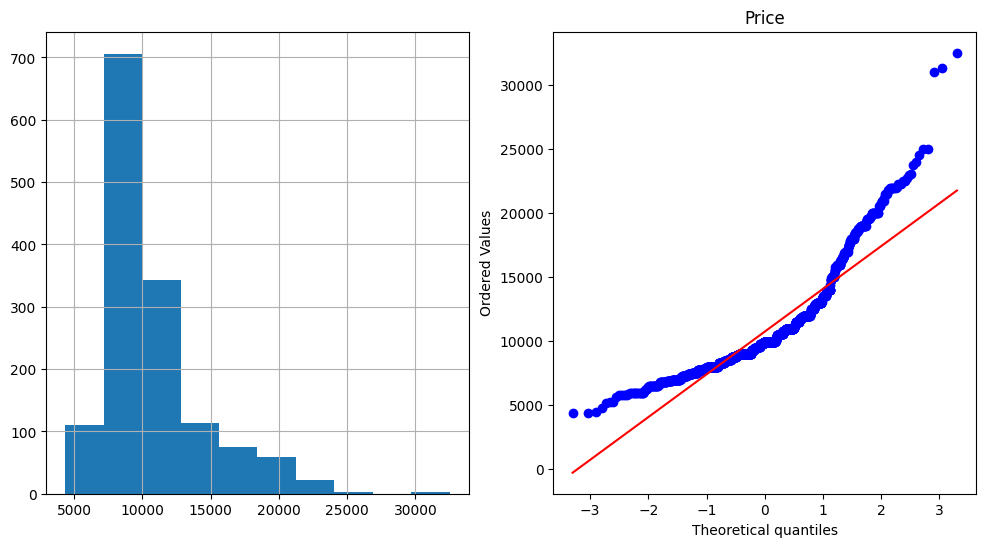

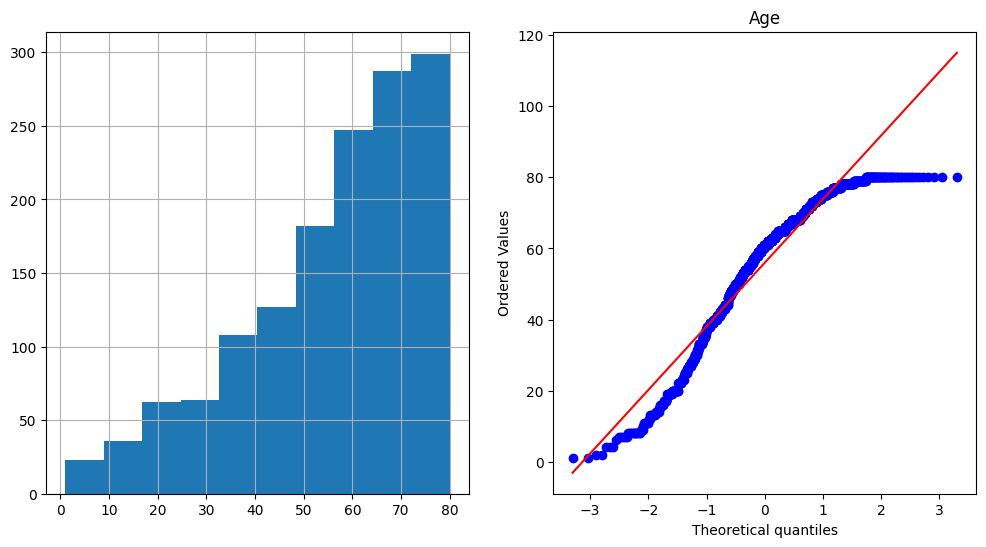

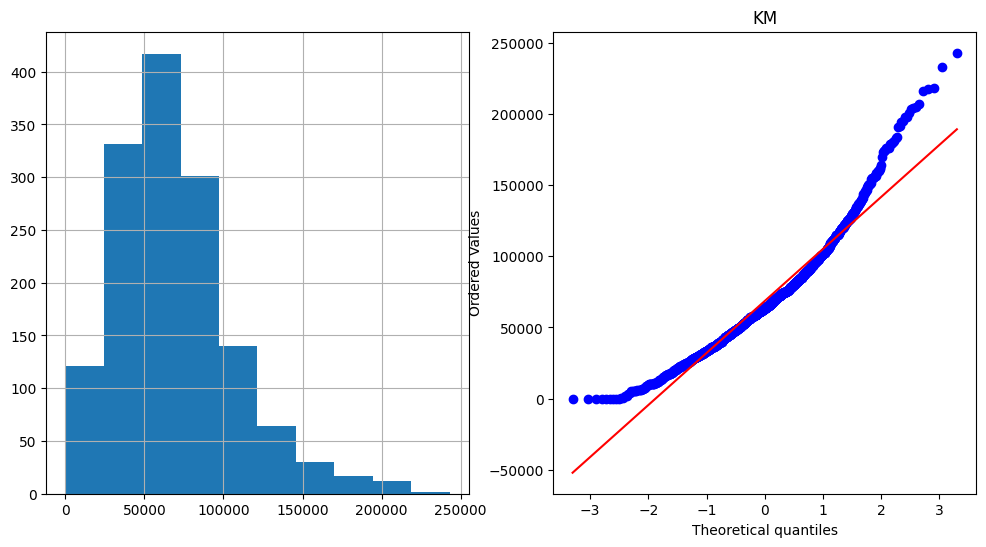

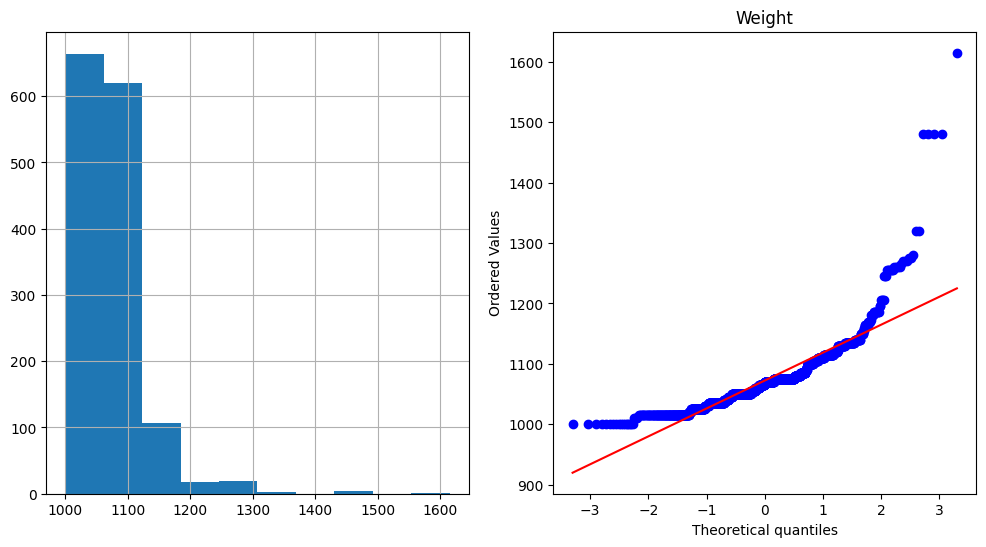

In [18]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

**Log transformation and visualizing the Histogram to determine any possible changes in distribution**

In [ ]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

**Square root transformation and visualizing the Histogram to determine any possible changes in distribution**

In [ ]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

**Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution**

In [ ]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

**Note: Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normailty.**

**The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.**

* To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [ ]:
data.columns

In [ ]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

**Observation: Since the p-values are less than .05, we reject the null hypothesis.**
* We have sufficient evidence to say that the sample data does not come from a normal distribution.

**Visualizing the Relation between each independent Feature with respect to the Dependent Feature**

In [ ]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

**Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features**

**Lets analyze the relationship between the discrete variables and Price**

In [ ]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

**Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation**

# Visualizing Continuous Datatype for Outlier Detection

In [ ]:
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

**Observation: A significant amount of outliers are present in each continuous feature**

* We can't simply remove the outliers that would mean loss of information
* We need to try different types of transformation or imputation and select the one with the best results
* Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values


**Lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case**





**Let's try Median Imputation to handle Outlier in Profit**

In [ ]:
df1=data.copy()
print(data.shape)
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()


In [ ]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

In [ ]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

In [ ]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

**Let's test our data in model and find the R-squared with median imputation data model**

In [ ]:
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

# Let's try Mean Imputation to handle Outlier 

In [ ]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

In [ ]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()

In [ ]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

In [ ]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

**Let's test our data in model and find the R-squared with mean imputation data model**

In [ ]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

**Observation: After mean imputation the model is not performing well**

**Observation: Even after imputation the model is not performing well it getting worse**
Now we have to try something else to get out model better than the raw data

**The best thing we can do is now to remove the outlier and see the results**

In [ ]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

In [ ]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

In [ ]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers')

In [ ]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

**Let's test our data in model and compare the R-squared with without imputation data model**

In [ ]:
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

In [ ]:
np.sqrt(removed_outlier_model.mse_resid)

**Let's try log transformation and visualize the result first**

In [ ]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [ ]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

**Observation: The outliers are still present**

**Let's try cuberoot transformation and visualize the result first**

In [ ]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [ ]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj 

**Observation: The outliers are still present**

**Observation: After removing Outliers the model performed very poorly than the raw data model**

# Raw Data Model

In [19]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [20]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:27:19   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
np.sqrt(raw_data_model.mse_resid)

1341.8046186938675

**Detecting Influencers/Outliers in the Model**
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [22]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

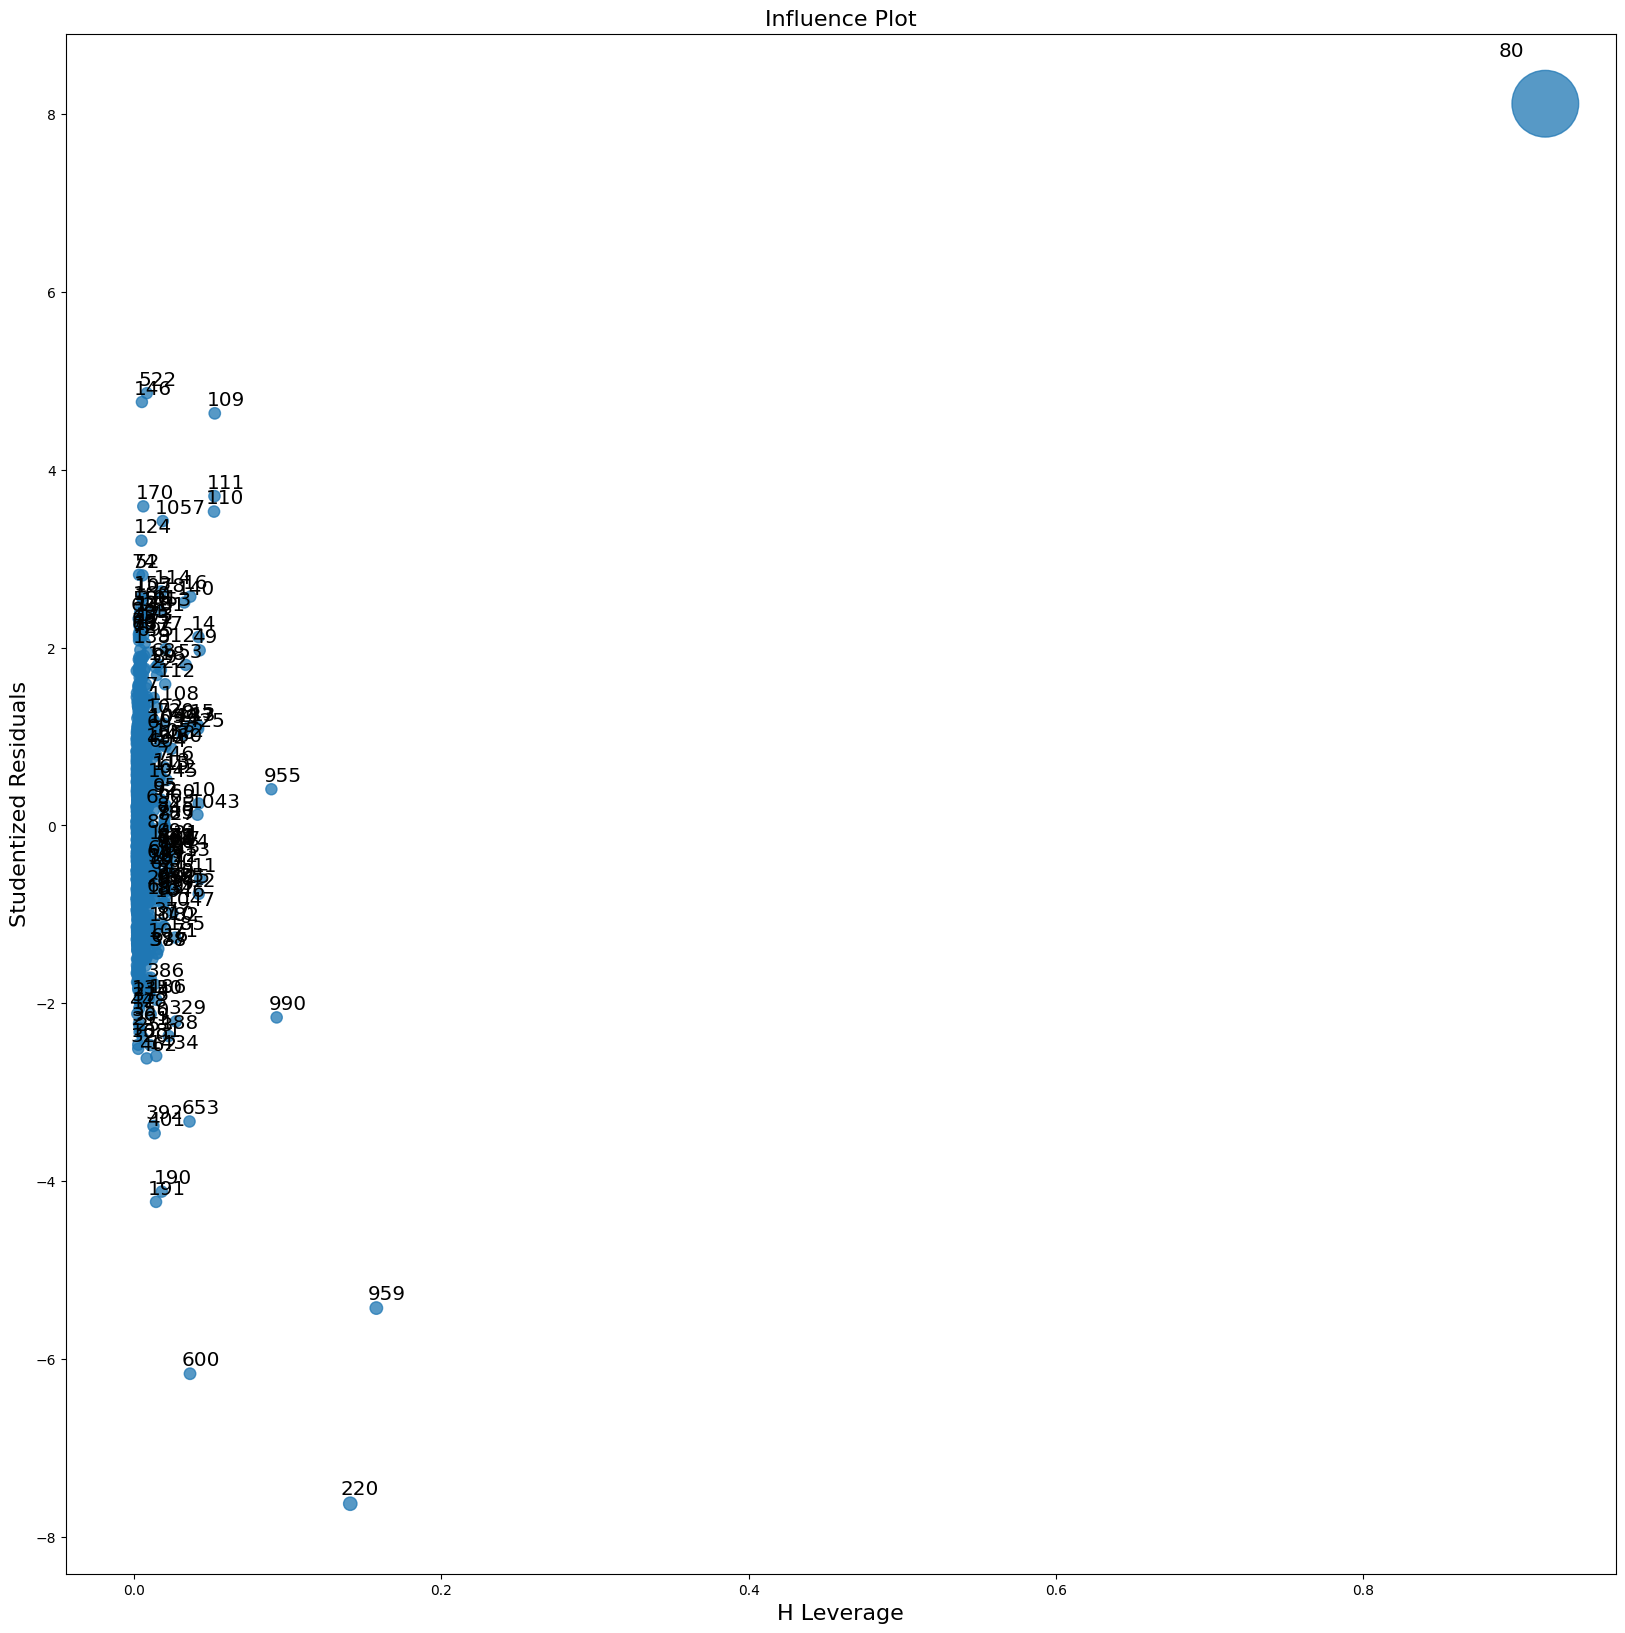

In [23]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

**Leverage Cuttoff Value** = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [24]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


**Let's plot the influencers and also plot a cut off line using the stem plot**

In [ ]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [26]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582254224)

In [27]:
data[data.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


**Let's improve the model by deleting the influence point and creating a new dataframe**

In [28]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [29]:
dataframe.shape

(1434, 9)

**Model Deletion Diagnostics and Final Model**

In [30]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [31]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [32]:
dataframe.shape

(1330, 9)

In [33]:
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


In [ ]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

**Observation: All the points are below our cut-off line**

* Hence, we can say that there are no influncers present in our model we can proceed with the predictions

In [34]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:29:10   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
np.sqrt(final_model.mse_resid)

975.9271399262798

# Feature Engineering

Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
**Log-Transformation**


In [ ]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

In [ ]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

**Cube-Root Transformation**

In [ ]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['QT'] = dataframe['QT']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

In [ ]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

# Square-Root Transformation

In [ ]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['QT'] = dataframe['QT']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

In [ ]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

# Applying Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)

#df_standard_scaled.head()

col_names = dataframe.columns
features = dataframe[col_names]

# select all columns except the first one for scaling
scaler = StandardScaler().fit(features.iloc[:, 1:].values)
features.iloc[:, 1:] = scaler.transform(features.iloc[:, 1:].values)

df_standard_scaled2 = pd.DataFrame(features, columns=col_names)
df_standard_scaled2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,14950,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,13750,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,12950,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,16900,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [37]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:30:35   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation**: After the transformation and building models the R-Squared had varince with respect to other transformations

But standard scaler is better than raw data model and other models with better AIC, BIC log-likelihood scores

We have to perform model validation test to check which model is better will do at the end of this

# For building Multi Linear Resgression there are assumption regarding the data set.
They are as follows:-

* Feature should be independent of each other there should'nt be any dependency upon each other

* There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
* Each Feature and Model Error (residuals) should be independent of each other
* Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

* There should be a linear relation between the dependent variable and Independent variables

**We will Check the above one by one**

**Preparing a Model**

In [ ]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

# Model Testing

**Test by Calculating VIF ( Variance Inflation Factor )**

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

**We generally want a VIF that is less than 5. As you can see QT has the highest value among others lets investigate**

In [ ]:
#Simple Linear Model using QT
qt_model = smf.ols('Price~QT', data=df_standard_scaled).fit()
qt_model.summary()

In [ ]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

In [ ]:
gears_qt_weight_model = smf.ols('Price~Gears+QT', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

**Model1**
**Dropping the variable and updating the model**
* As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears as it has a very high P Value of 0.75 in SLR and 0.12 in MLR has R square score of 0. Let's go ahead and drop this variable

In [61]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)
print(x)

         Price       Age        KM        HP        CC     Doors        QT  \
0     1.057454 -1.915503  0.136289 -0.883769  2.526466 -1.067888  3.424789   
1     1.446875 -1.746462 -0.576515 -0.883769  2.526466 -1.067888  3.424789   
2     1.057454 -1.521074 -0.848065 -0.883769  2.526466 -1.067888  3.424789   
3     0.797839 -1.408380 -0.204921 -0.883769  2.526466 -1.067888  3.424789   
4     2.079684 -1.690115  0.755851 -0.883769  2.526466 -1.067888  3.424789   
...        ...       ...       ...       ...       ...       ...       ...   
1325 -0.662491  1.296279 -1.291120 -1.197442 -1.423258 -1.067888 -0.460904   
1326 -0.970782  0.676461 -1.361323 -1.197442 -1.423258 -1.067888 -0.460904   
1327  0.114729  0.845502 -1.405457 -1.197442 -1.423258 -1.067888 -0.460904   
1328 -0.646265  0.789155 -1.462168 -1.197442 -1.423258 -1.067888 -0.460904   
1329 -1.051912  0.732808 -1.465026 -1.197442 -1.423258 -1.067888 -0.460904   

        Weight  
0     2.456469  
1     2.456469  
2     2.5805

In [62]:
x.columns


Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [63]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:30:17   Log-Likelihood:                -354.65
No. Observations:                1330   AIC:                             725.3
Df Residuals:                    1322   BIC:                             766.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6233      0.013    -49.609      0.000      -0.648      -0.599
KM            -0.1743      0.012    -14.750      0.000      -0.197      -0.151
HP             0.0360      0.012      2.915      0.004       0.012       0.060
CC            -0.1329      0.017     -7.955      0.000      -0.166      -0.100
Doors         -0.0493      0.010     -5.016      0.000      -0.069      -0.030
QT            -0.1350      0.019     -7.057      0.000      -0.172      -0.097
Weight         0.4850      0.019     25.656      0.000       0.448       0.522
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**our insignificant variables problem has been solved**

# Feature Selection Techniques in Machine Learning

**Correlation Coefficient**

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True)

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

**Observation: Age and KM has the highest score of correlation with Price but a negative correlation**

Note: QT and Weight also have a collinearity among themselves which will affect our model but the VIF for both is < 5 so we are not dropping that coloumn.
Note: KM and Age also have a collinearity among themselves which will affect our model but VIF < 5.

# Predicting using model

In [40]:
df = df_standard_scaled2.copy()

df = df_standard_scaled2.drop(['Gears'], axis=1)

#cols = list(df.columns)
#cols.remove('Price')
#cols.append('Price')

# create new dataframe with columns reordered
#df = df[cols]

# print the new dataframe
df.head()
# dataframe.head()
#final_standard_scaled_model = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = df).fit()
#final_standard_scaled_model.summary()

# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df.drop('Price', axis=1))
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
# df_scaled['Price'] = scaler.fit_transform(df[['Price']]) # apply standardization to the target variable


,Price,Age,KM,HP,CC,Doors,QT,Weight
0,13750,-1.915503,0.136289,-0.883769,2.526466,-1.067888,3.424789,2.456469
1,14950,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,3.424789,2.456469
2,13750,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,3.424789,2.580538
3,12950,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,3.424789,2.580538
4,16900,-1.690115,0.755851,-0.883769,2.526466,-1.067888,3.424789,4.441570


In [48]:
# Split data into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(df_scaled.iloc[:,:-1], df_scaled.iloc[:,-1], test_size=0.3, random_state=0)
X = df.iloc[:, 1:]     # all but the first column
Y = df.iloc[:, 0]      # first column only

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

#x_train.shape, x_test.shape , y_train.shape, y_test.shape
x_train.head()
#y_train.head()

,Age,KM,HP,CC,Doors,QT,Weight
1138,1.183585,0.412355,-1.197442,-1.423258,-1.067888,-1.838809,-1.265595
982,1.296279,2.154990,-1.197442,-1.423258,-1.067888,-0.460904,-0.521182
634,0.282032,0.624021,0.684598,0.269481,-1.067888,-0.460904,-0.397113
1299,0.901849,-0.594809,-1.197442,-1.423258,-1.067888,-0.460904,-1.389664
1305,1.014543,-0.698856,0.684598,0.269481,1.028482,-0.019974,0.099162


In [54]:

y_train.shape
print(y_train)

1138    5950
982     6950
634     8490
1299    7000
1305    7900
        ... 
763     9950
835     8950
1216    8250
559     9450
684     8900
Name: Price, Length: 931, dtype: int64


In [50]:
# Train the model
final_standard_scaled_model = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = df).fit()


In [70]:
# Predict on test set using the trained model
y_pred_scaled = final_standard_scaled_model.predict(x_test)
y_pred_scaled = y_pred_scaled.to_numpy()
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform the predicted values
#y_pred = scaler.inverse_transform(arr_2d)

# Print the predicted values
#print(y_pred_scaled)
#print(y_test)

print("y_test    y_pred_scaled")
print("-------------")

for a, b in zip(y_test, y_pred_scaled):
    print(f"{a}    {b}")




y_test    y_pred_scaled
-------------
7500    [7727.16693667]
10950    [10735.90583327]
10500    [10625.74734509]
13950    [12172.06054725]
7950    [6608.18924099]
11495    [11609.04996757]
12950    [12267.62859608]
8950    [9802.99290734]
10500    [12984.38169879]
11750    [11087.58118891]
10500    [10197.06959524]
11480    [12693.29042712]
9500    [9421.62257813]
6900    [7861.41400689]
8950    [9160.82720873]
8500    [9173.90961817]
7750    [8681.90034789]
21125    [19284.40445709]
7450    [6750.92821884]
18950    [16390.89184619]
6900    [9059.89249502]
7350    [7107.30507898]
10950    [10756.37100008]
18600    [17537.19102054]
16450    [16993.07631312]
15999    [16052.29382813]
16750    [15853.61058994]
8745    [9696.51491143]
10750    [8881.62391061]
11250    [11089.68117837]
11950    [13005.06083167]
15950    [16342.48752905]
9950    [10218.26310708]
15950    [16025.69179029]
11950    [13443.27416591]
8250    [8392.32760078]
9475    [10789.49403692]
9950    [8240.03428031]
11750

# Model Validation



**Observation: The Model that was build using Standard Scaler Transformation performed very well.**
Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared
* Note: We are going ahead with the model final_standard_scaled_model

# Residual Analysis

* Test for Normality of Residuals (Q-Q Plot)

In [71]:
Final_model = final_standard_scaled_model

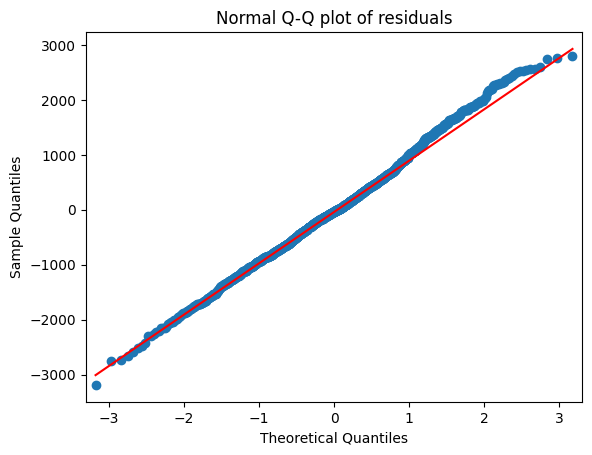

In [72]:
#Residuals values  = y - yhat
from statsmodels.graphics.gofplots import qqplot
qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

**Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.**

**Residual Plot for Homoscedasticity**

In [97]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

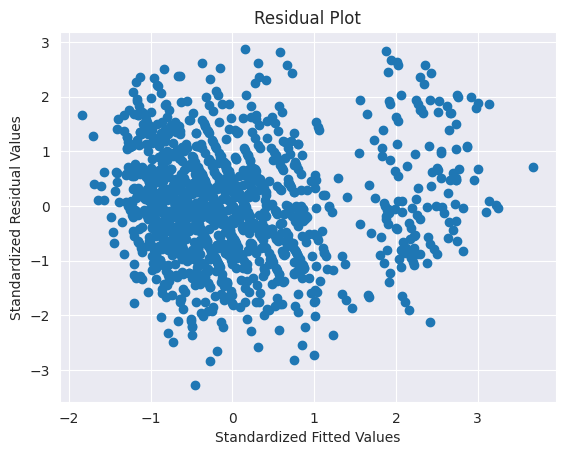

In [98]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

**Observation: Constant Variance (Homoscedasticity) in Error**

Residual VS Regressors

* Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

eval_env: 1


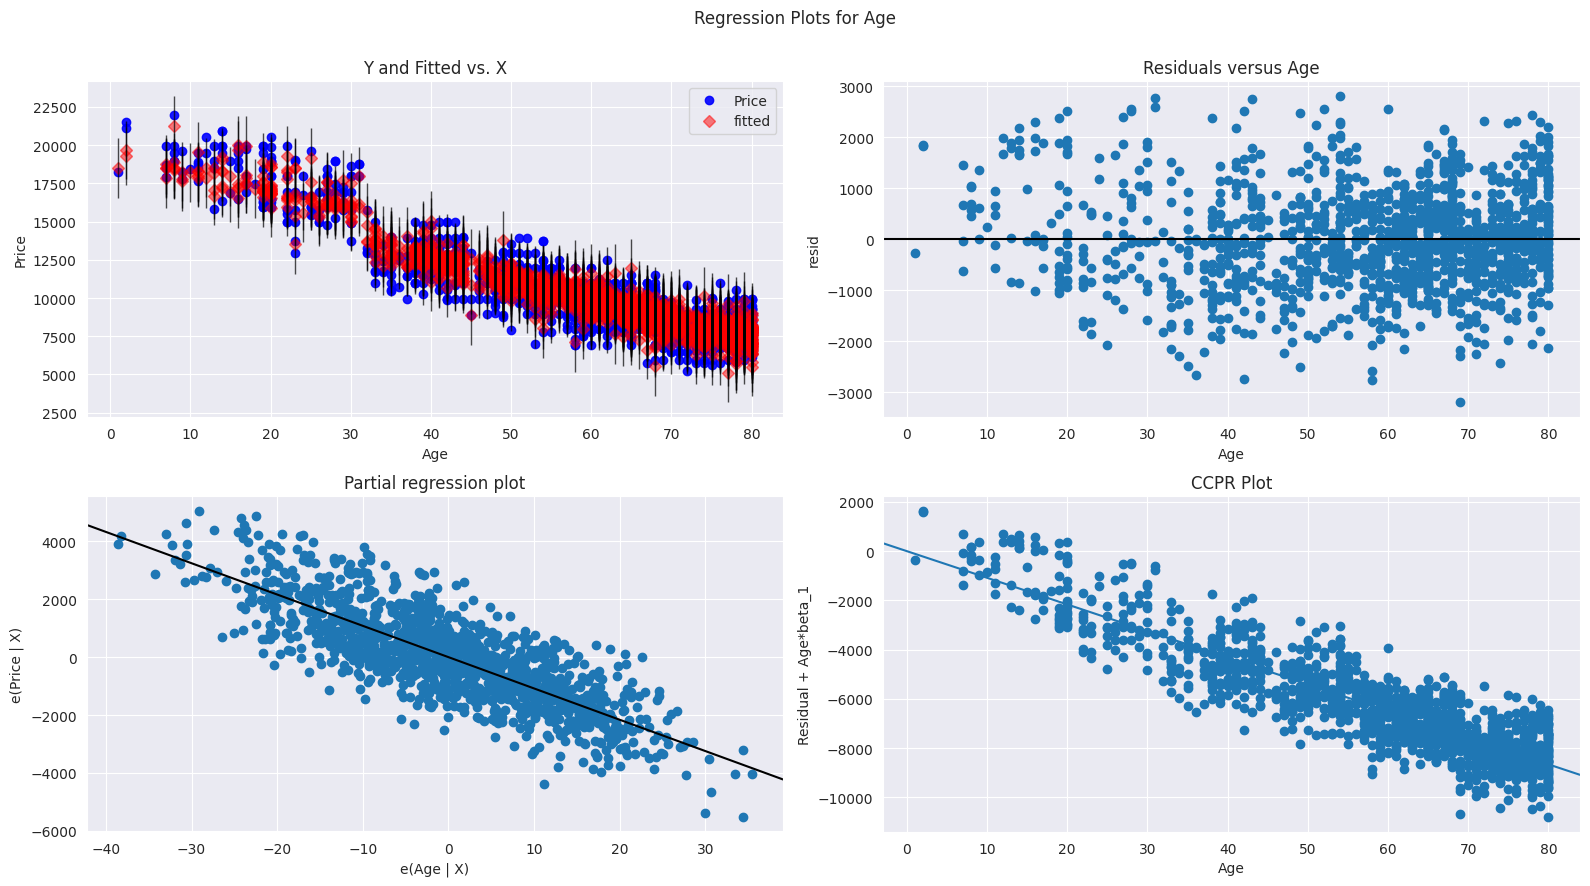

In [99]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog


fig = plt.figure(figsize = (16,9))
plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

eval_env: 1


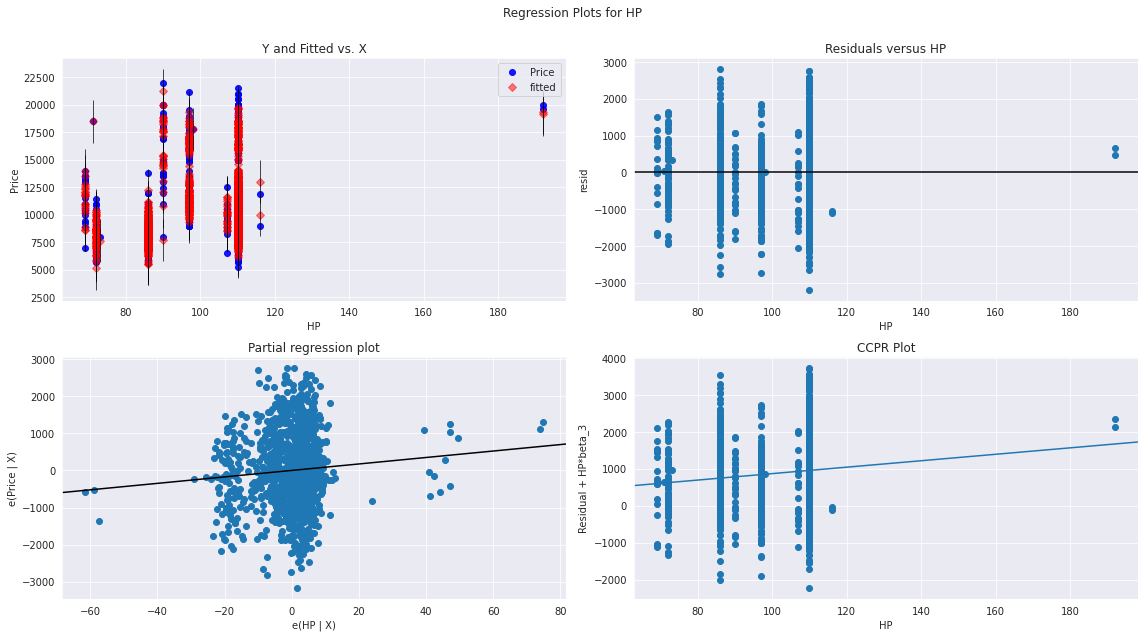

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

eval_env: 1


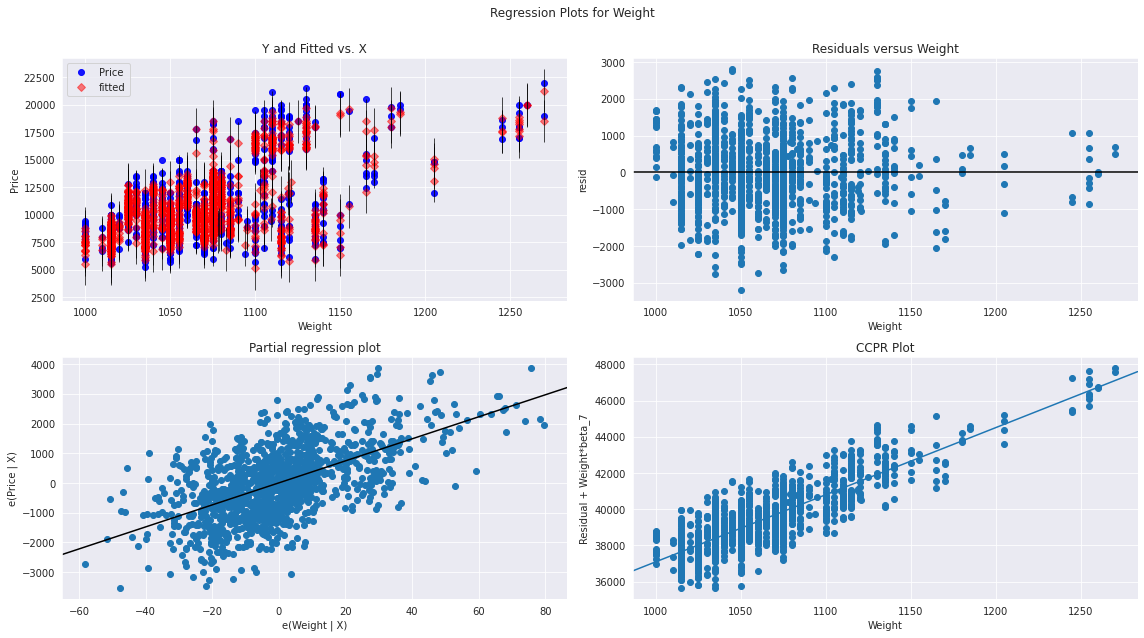

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

eval_env: 1


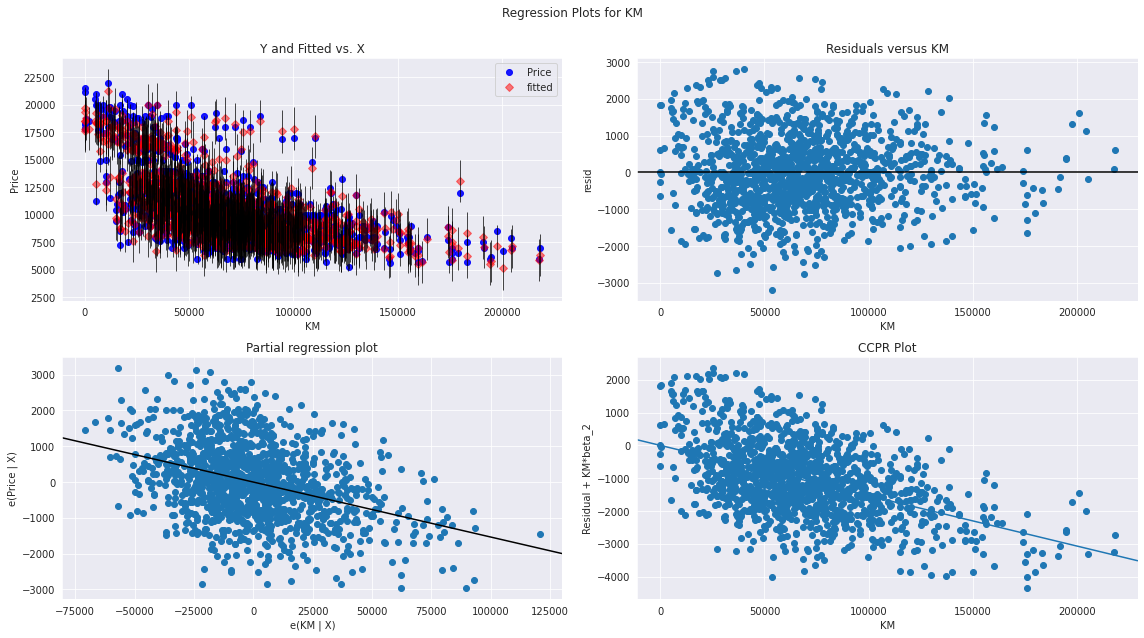

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

eval_env: 1


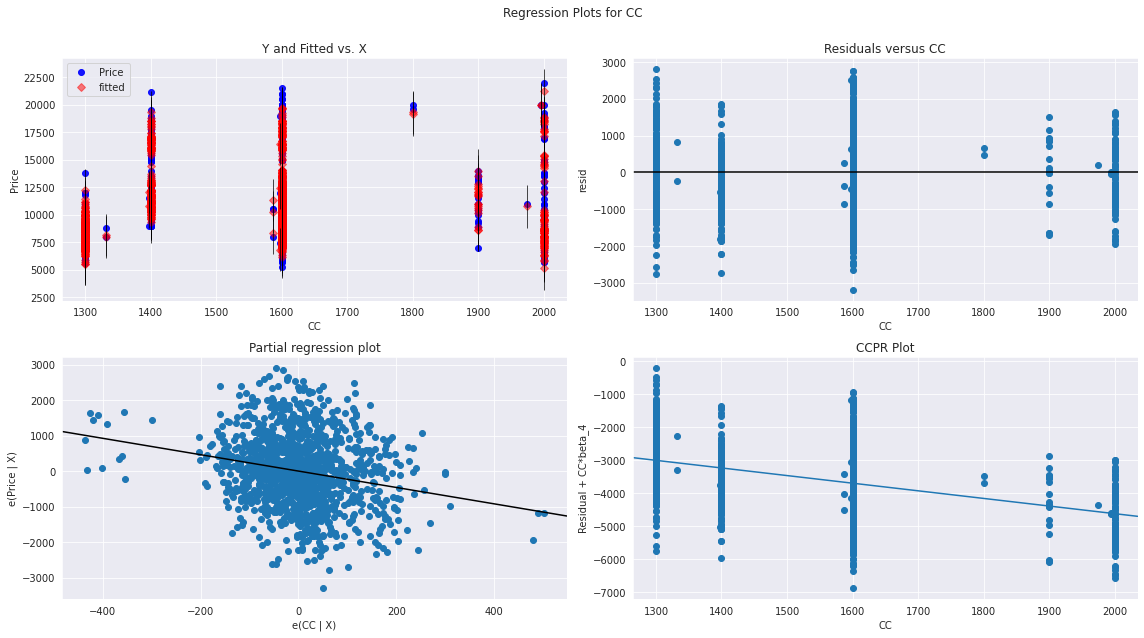

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

eval_env: 1


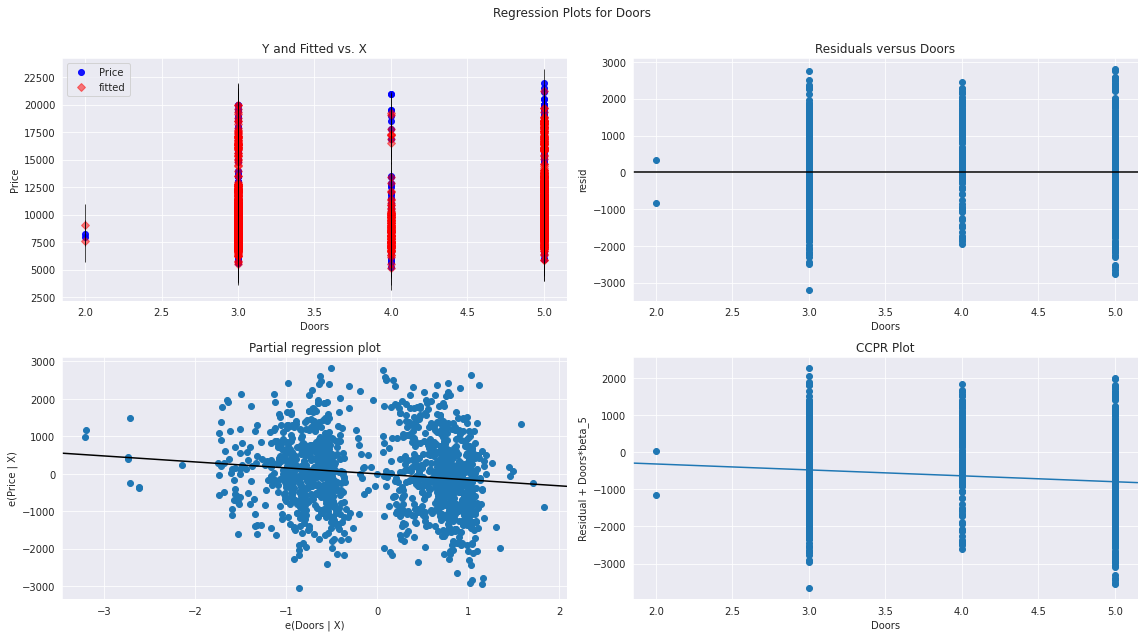

In [ ]:
fig = plt.figure(figsize = (16,9))
plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

**Observation:**
* Some of the feature doesn't suggest linear relationship with the Residuals
* Dependent feature like Gears, QT, CC, Doors, Weight and HP
Only KM and Age is having a linear relation with the Price Feature